## Introduction

**Background**  
Online gaming communities generate large amounts of behavioral data that can help researchers understand what drives player engagement. In particular, total play time reflects how much a user enjoys and persists with a game, and predicting it from simple demographic features could inform server management and personalized recommendations.

**Research Question**  
Can a player’s age predict their total play time on the research server?  
- **Response variable:** total play duration per player (`played_hours`)  
- **Explanatory variable:** player age in years (`age`)

**Data Description**  
We use the `players.csv` dataset exported from the research server. It contains **N** observations and **6** variables:  
- `subscribe` (logical): whether the user held a subscription  
- `hashedEmail` (character): anonymized user identifier  
- `played_hours` (numeric): total play duration in hours  
- `name` (character): player’s display name  
- `gender` (character): player’s self-reported gender  
- `age` (numeric): player’s age in years  

For this analysis we focus on the two numeric variables `played_hours` (response) and `age` (predictor), both of which require no additional type conversion.


In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
players <- read_csv("players.csv")
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [5]:
# Summary statistics for age and played_hours
summary(players$Age)
summary(players$played_hours)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   8.00   17.00   19.00   20.52   22.00   50.00       2 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.100   5.846   0.600 223.100 

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


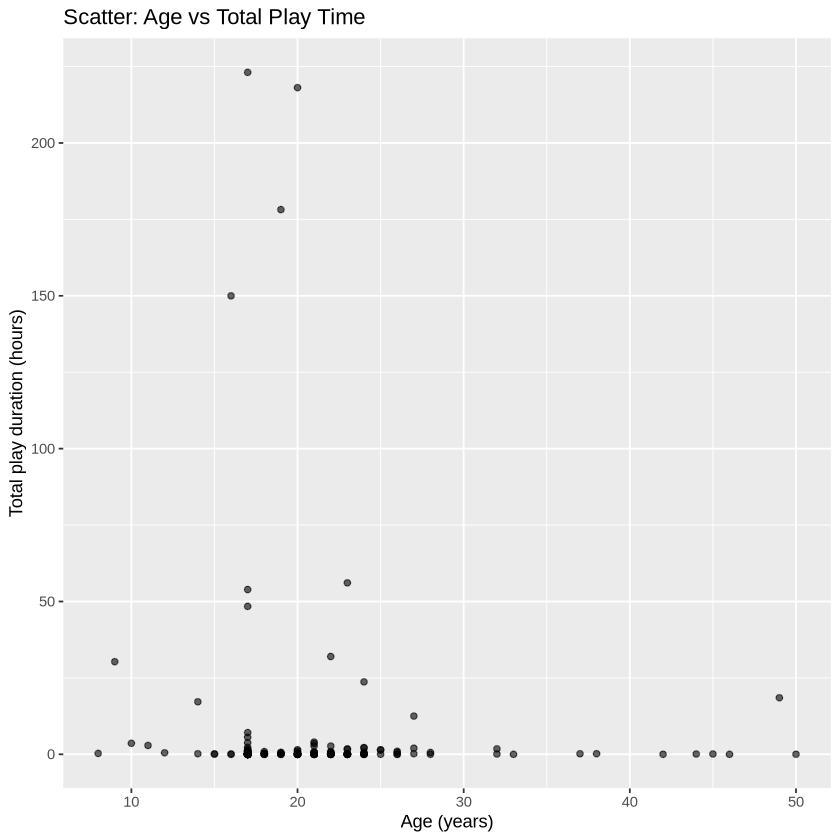

In [11]:
# Scatter plot of age vs total play time
ggplot(players, aes(x = Age, y = played_hours)) +
  geom_point(alpha = 0.6) +
  labs(title = "Scatter: Age vs Total Play Time",
    x = "Age (years)",
    y = "Total play duration (hours)")


### Interpretation of the Scatter Plot

The scatter plot of **Age (years)** vs **Total play duration (hours)** shows:

- **Most points clustered at low playtimes** (0–10 hrs) across a broad range of ages (≈10–50).  
- **A handful of outliers** with very high playtimes (≈150–225 hrs), all coming from younger players (≈16–20 yrs).  
- The warning 
  > “Removed 2 rows containing missing values or values outside the scale range (`geom_point()`).”  
  means two observations had missing or invalid `age` values and were automatically dropped from the plot.

Overall, there isn’t a clear linear trend, but we see that a small group of younger players logs substantially more hours, while the majority plays very little.


In [8]:
# Fit a simple linear regression model
model <- lm(played_hours ~ Age, data = players)

# Display model coefficients
broom::tidy(model)


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),11.1225388,7.1253733,1.5609763,0.1201761
Age,-0.2542759,0.3325746,-0.7645681,0.4454674
